In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('Xiomi_data.csv')

In [19]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668
1,2,Saturday,Chrome,15,5,16.9,3469
2,3,Monday,Internet Explorer,20,6,7.3,5215
3,4,Monday,Chrome,42,6,30.1,10423
4,5,Saturday,Internet Explorer,20,6,13.3,5404


In [4]:
df.drop('Customer',axis = 1, inplace=True)

In [5]:
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,Monday,Chrome,13,4,8.5,2668
1,Saturday,Chrome,15,5,16.9,3469
2,Monday,Internet Explorer,20,6,7.3,5215
3,Monday,Chrome,42,6,30.1,10423
4,Saturday,Internet Explorer,20,6,13.3,5404


In [6]:
lb = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' :
        df[col] = lb.fit_transform(df[col])

In [7]:
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,0,13,4,8.5,2668
1,2,0,15,5,16.9,3469
2,1,2,20,6,7.3,5215
3,1,0,42,6,30.1,10423
4,2,2,20,6,13.3,5404


In [8]:
x = df.drop('Amount Spent (Rs.)',axis=1)
y = df['Amount Spent (Rs.)']


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [10]:
# Building Deep learning model

In [11]:
model = Sequential([Dense(500,activation='tanh',input_shape = (x.shape[1],)), #input_layer
                   Dense(1000,activation='sigmoid'),   #first hidden layer
                   Dense(2000,activation='sigmoid'),   #second hidden layer
                   Dense(1,activation='relu')])        #output layer

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3000      
                                                                 
 dense_1 (Dense)             (None, 1000)              501000    
                                                                 
 dense_2 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_3 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2,508,001
Trainable params: 2,508,001
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='Adam',loss='mse',metrics=['mse'])

In [14]:
history = model.fit(x_train,y_train,epochs=30,batch_size= 500,validation_data=[x_test,y_test])

Epoch 1/30
61/61 [==============================] - 9s 127ms/step - loss: 56113372.0000 - mse: 56113372.0000 - val_loss: 54836344.0000 - val_mse: 54836344.0000
Epoch 2/30
61/61 [==============================] - 7s 119ms/step - loss: 55207768.0000 - mse: 55207768.0000 - val_loss: 53962520.0000 - val_mse: 53962520.0000
Epoch 3/30
61/61 [==============================] - 7s 120ms/step - loss: 54331740.0000 - mse: 54331740.0000 - val_loss: 53097704.0000 - val_mse: 53097704.0000
Epoch 4/30
61/61 [==============================] - 7s 121ms/step - loss: 53465244.0000 - mse: 53465244.0000 - val_loss: 52240468.0000 - val_mse: 52240468.0000
Epoch 5/30
61/61 [==============================] - 7s 118ms/step - loss: 52607304.0000 - mse: 52607304.0000 - val_loss: 51394712.0000 - val_mse: 51394712.0000
Epoch 6/30
61/61 [==============================] - 7s 119ms/step - loss: 51755552.0000 - mse: 51755552.0000 - val_loss: 50551200.0000 - val_mse: 50551200.0000
Epoch 7/30
61/61 [======================

In [15]:
# plotting the accuracy and Loss plot

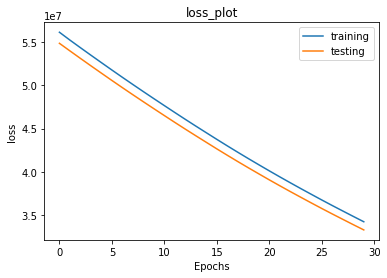

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss_plot')
plt.legend(['training','testing'])

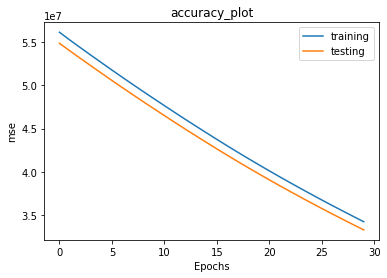

In [17]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.title('accuracy_plot')
plt.legend(['training','testing'])